# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 2: Clasificación

__Número de grupo: 3

__Nombres de los estudiantes: Ana Belén Duarte y Ángeles Plaza

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
df = pd.read_csv("cleveland.csv")
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')
df.loc[df['target']==1,'target']='enfermo'
df.loc[df['target']==2,'target']='enfermo'
df.loc[df['target']==3,'target']='enfermo'
df.loc[df['target']==4,'target']='enfermo'
df.loc[df['target']==0,'target']='normal'
df = df.dropna()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,enfermo


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

In [2]:
df['target'].value_counts()

normal     160
enfermo    137
Name: target, dtype: int64

In [3]:
#Medimos la frecuencia de cada una de las clases : enfermo y normal
df['target'].value_counts() / df['target'].count() * 100

normal     53.872054
enfermo    46.127946
Name: target, dtype: float64

En este caso, ambas clases están bastante equilibradas. Hay casi la mitad de enfermos y de pacientes sanos. No será necesario, por lo tanto, hacer una partición estratificada que mantenga la proporción de las clases para los conjuntos de datos de entrenamiento y validación porque ya se mantiene una proporción bastante ajustada.

In [4]:
#Describimos el data frame para ver como están distribuidas las variables 
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


### Rangos de las variables numéricas:
Al mirar la tabla nos damos cuenta de que los rangos de las variables son muy distintos, tanto en magnitud como en el intervalo en que se mueven entre valor máximo y mínimo. En el caso de ca y oldpeak toman valores muy pequeños, de hecho sabemos que oca solo puede moverse en el rango de 0 a 3, y por tanto es lógico que por tener 297 individuos, al menos uno de ellos deberá tener el valor máximo y otro el mínimo. Además el valor de la mediana refleja que la mayor parte de los ejemplares presenta el valor 0, y por tanto todos los valores suelen ser muy bajos.

Por otra parte, oldpeak se mueve en el rango [0, 6.2] para nuestro conjunto de individuos, y el valor de la mediana corresponde a 0.8, y la media 1.05, por lo que como ocurria en el caso de ca, los valores suelen ser muy bajos aunque existan individuos con valores cercanos al máximo pero en menor medida.

Asimismo, cuando hablamos del resto de variables, que toman valores más altos, estos parecen coincidir con aquello que representan. La variable edad se mueve entre los valores [29, 77] por lo que no parece muy representativa por incluir individuos solo a partir de los 29 años, dejando a una gran parte de la juventud al margen de estudio. Esto tampoco supone un gran problema, ya que las enfermedades graves/genéticas/debidas a malos hábitos suelen desencadenarse a una edad más tardía, aunque convendría tener ejemplares más jóvenes para que en el caso de tratar de predecir si alguien muy joven está enfermo con este modelo, el valor sea más fiable. 

La variable colesterol tiene el rango más amplio, entre [126, 564], aunque es visible que los valores suelen estar entorno a la mitad inferior.

Por último, thalach varía en nuestros ejemplares en el rango [71, 202]. Además los valores están bastante equilibrados, de hecho la media se encuentra casi en el valor central de este rango, y la mediana o valor medio también es muy parecido. Esta variable aparece en nuestro rango de valores por igual. 

### Desviaciones:

Las desviaciones típicas son muy diversas pero debemos recordar que refleja la desviación respecto a la media en promedio, por ello está relacionada con la escala de la variable. Tanto en oldpeak como en ca aunque las desviaciones son muy pequeñas en valor, estas tienen un peso bastante grande por tomar ca y oldpeak valores muy cercanos a 1, por ello la desviación es significativa. 

En cuanto al resto de variables, que tienen valores en rangos mayores, algunas de ellas tienen desviaciones mayores como chol y algo menor en talach. Esto parece comprendible, ya que como chol puede tomar un rango de valores muy amplio y además es una variable que sabemos que depende mucho de la alimentación y hábitos de la persona, así como de la genética, tiene tendencia a desviarse. Lo mismo ocurre con el heartrate, depende de numerosos factores como la edad o el estado físico del individuo.

La edad tiene una desviación de 9, lo que parece comprensible si tomamos gente de distintas edades entre 30 y 70, y la presión sanguínea tiene desviación ni muy grande ni muy pequeña.

Ahora, vamos a ver las relaciones 2 a 2 de las variables numéricas. Dibujaremos su diagrama de dispersión y calcularemos el coeficiente de correlación de Pearson para poder ver cómo de relacionada está una con la otra.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


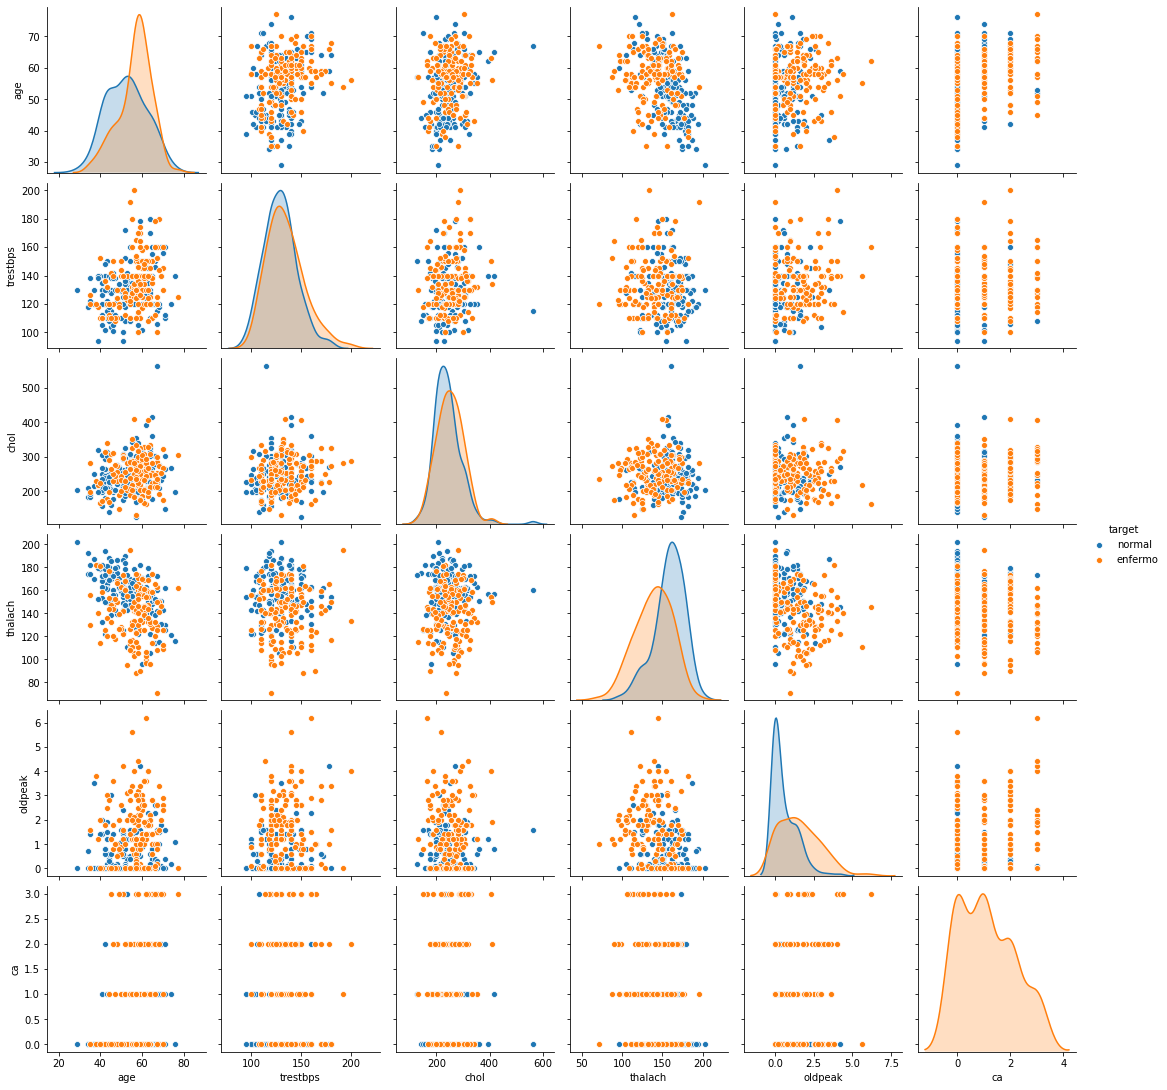

In [5]:
import seaborn as sns
nombres_col=['age','trestbps','chol','thalach','oldpeak','ca','target']
df1=df.loc[:,nombres_col]
df1
sns.pairplot(df1, diag_kind='kde',hue='target')

### Relación dos a dos de las variables numéricas:
En un primer vistazo, lo que más llama la atención es la relación de la variable ca con el resto de variable. Estas líneas se deben a que únicamente toma valores enteros. 

Por otro lado, la relación dos a dos entre las variables parece bastante difusa, no parece existir algún tipo de correlación directa entre dos de ellas, y por ello se forman estas nubes de puntos con colores superpuestos. Por ello, creemos que el problema será bastante difícil de resolver, puesto que no hay variables que claramente separen enfermos de personas sanas según los valores que tomen. 

Lo que sí podemos apreciar es que para la variable oldpeak, para valores muy pequeños de ella tenemos casi todo el rango de valores del resto. Casi puede pareces en todas las gráficas que tienen a esta variable oldpeak que cuando toma un valor bajo tuviésemos una línea vertical.

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

### Razonamiento ###
Como vamos a construir un arbol de decisión no será necesario esacalar o estandarizar los datos porque no vamos a relacionar las variables entre sí. Para construir el árbol es necesario calcular la entropía de cada atributo y en ese cálculo influye la probabilidad de pertenecer a una clase u a otra del atributo pero no es necesario relacionar los valores de ésta con los valores de otra de las variables para lo que si sería necesario que estuviesen en la misma escala

## 4) Profundidad óptima del árbol

Elige razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.

__Nota__: parece que la clase DecisionTreeClassifier no es capaz de trabajar con variables categóricas y usa sus correspondientes valores numéricos. Eso no es una buena idea porque establece una distancia entre las categorías que no tiene por qué tener sentido. Se podrían recodificar las variables categóricas usando un [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) pero en esta práctica no es necesario hacerlo.

### Solución
Usaremos un 25% de los datos para test y el resto de datos lo usaremos para el entrenamiento. Como comentamos anteriormente, no será necesario estratificar los datos de entrenamiento puesto que las clases están bastante equilibradas.
Para elegir la profundidad óptima usaremos el algoritmo de validación cruzada: dividiremos el conjunto en 10 partes y se usan 9 para entrenar y otra para validar. Cada una de las partes será usada una vez para validar el clasificador.

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
RANDOM_STATE=83
#PREGUNTAR SI SOLO VAR NUMERICAS O TODAS
var_numericas=['age','trestbps','chol','thalach','oldpeak','ca']
#Hacemos una copia del dataframe con todas las variables menos la variable target
df_sin = df.drop(['target'],axis=1)
var_sint=['age','trestbps','chol','thalach','oldpeak','ca','sex','cp','fbs','restecg','exang','slope','thal']
# Creamos y entrenamos el árbol de decisión con los parámetros por defecto
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf = clf.fit(df_sin, df['target'])

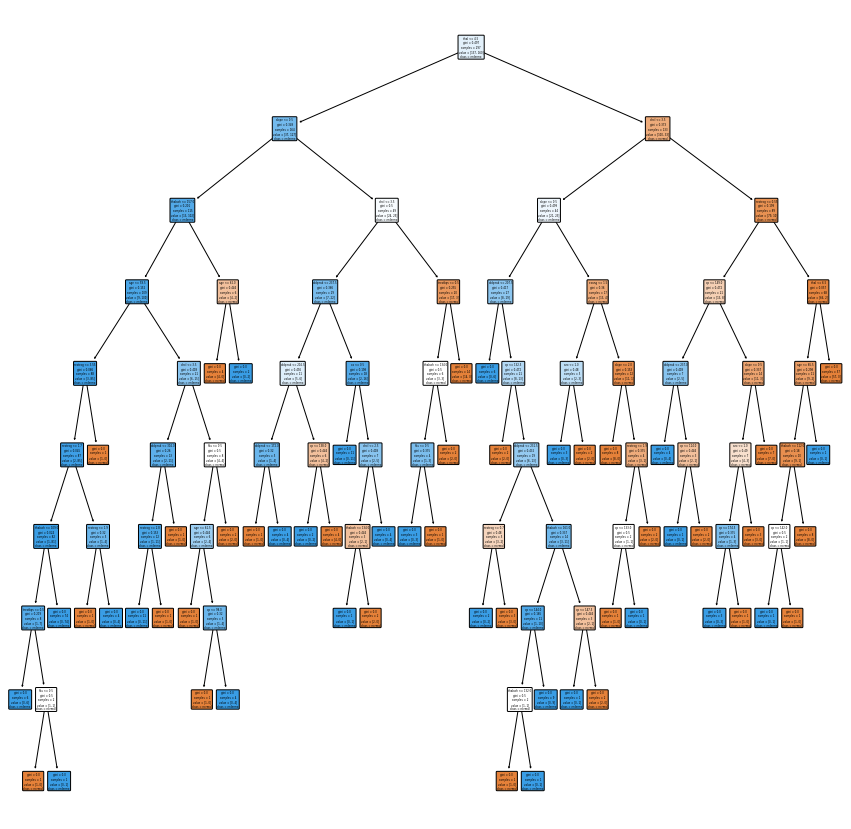

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Pintamos el árbol
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, feature_names=var_sint, class_names=df['target'], rounded=True)
plt.show()

### Comentario:###
Si nos fijamos en la documentación de la función plot_tree, observamos que le podemos enviar una serie de parámetros, para "dirigir" la creación del árbol de decisión. Por ejemplo, podemos decir cuál queremos que sea la profundidad máxima del árbol, si queremos mostrar la impureza de cada nodo o incluso el aspecto de los nodos. En este caso, como no especificamos la profundidad máxima, el árbol alcanza una profundidad muy grande donde ha conseguido separar todas las clases del conjunto de entrenamiento perfectamente. Sin embargo, esto no significa que sea un clasificador perfecto sino que clasifica perfectamente los datos de entrenamiento. No está totalmente claro que clasifique correctamente nuevos ejemplos porque puede que en los datos de entrenamiento se incluyan individuos que no son muy representativos y eran perqueñas excepciones. Es decir, puede que este árbol haya sobreaprendido.  
Por ello, vamos a elegir la profundidad óptima del árbol que nos permita clasificar de una forma "bastante buena" los nuevos ejemplos que le lleguen (conjunto de validación o test) y que sin embargo no haya sobre aprendido. Para llevar a cabo la elección de esta profundidad usaremos validación cruzada en 10 partes y analizaremos la curva de aprendizaje obtenida para los distintos valores de k 

In [8]:
from sklearn.model_selection import cross_validate
import numpy as np
train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas entre 1 y 16
max_depths = range(1, 16)
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    scores = cross_validate(clf, df_sin, df['target'], scoring='accuracy', cv=10, return_train_score=True)
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

    
    
#aqui tenemos la exactitud calculada tanto para el conjunto de entrenamiento,
#como el de validación para los 15 valores de k distintos que estamos calculando
#Los resultados obtenidos, los visualizaremos mejor en una gráfica que relacione el valor de k
#con la exactitud conseguida. La llamaremos curva de aprendizaje
train_accuracy, test_accuracy

([0.764682206942814,
  0.7706691262787189,
  0.8518516965733133,
  0.8720484655374812,
  0.9139569008888143,
  0.9502557437531444,
  0.970835429593605,
  0.9831796075800773,
  0.9932682095142267,
  0.9985060651797195,
  0.9992523338364357,
  1.0,
  1.0,
  1.0,
  1.0],
 [0.7404597701149426,
  0.7104597701149425,
  0.7906896551724139,
  0.7608045977011495,
  0.7571264367816093,
  0.7539080459770114,
  0.7709195402298851,
  0.764022988505747,
  0.7775862068965518,
  0.7639080459770116,
  0.7674712643678162,
  0.7606896551724139,
  0.7606896551724139,
  0.7606896551724139,
  0.7606896551724139])

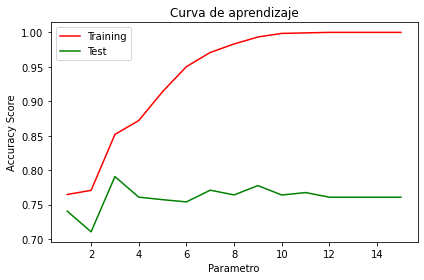

In [9]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

### Conclusión: k óptima
Como hemos comentado un poco más arriba en el código, en esta gráfica podemos ver el comportamiento de nuestro árbol de decisión en lo que a la relación profundidad del árbol-exactitud se refiere. Si nos fijamos en la curva roja que representa la exactitud del clasificador según el valor de k para el conjunto de entrenamiento, vemos que llega un momento dónde se estabiliza más o menos a partir de k=8. A partir de k=12 como podemos observar también en los datos obtenidos arriba la exactitud ya vale 1, lo que significa que un árbol de decisión con k>=12 clasifica perfectamente los datos de entrenamiento. Seguramente, con k tan grandes estaremos sobre aprendiendo.
La línea verde representa la exactitud del clasificador según la profundidad del árbol para los datos de validación o test. Es claro observado la gráfica que el valor de k para el que se alcanza el máximo de exactitud es k=3. Esto, nos lleva a concluir que la profundidad óptima que debe tener nuestro árbol de decisión es 3. 
Lo representamos a continuación

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. Analiza:
- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que hemos construido es capaz de separar las clases? 
- ¿En cuál de los nodos hoja existe mayor confusión?

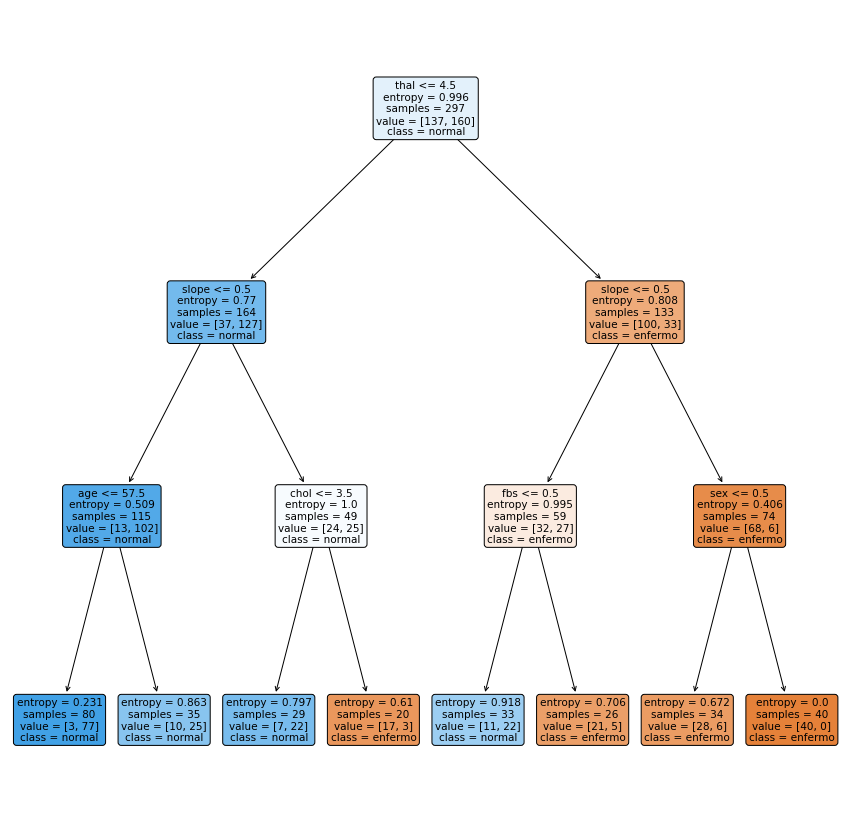

In [10]:
clf_opt = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
clf_opt = clf_opt.fit(df_sin, df['target'])
# Pintamos el árbol
plt.figure(figsize=(15,15))
plot_tree(clf_opt, filled=True, feature_names=var_sint, class_names=['enfermo','normal'], rounded=True)
plt.show()

## Comentar árbol obtenido:
Las variables de decisión más importantes son primero thal y luego slope ya que son las que se encuentran más arriba en el árbol y por tanto, las que nos permiten discriminar más a la hora de clasificar nuevos ejemplos.
En el árbol, existen variables que no se tienen en cuenta por ejemplo el tipo de dolor en el pecho (cp) o la presión sanguínea en reposo (trestbps). Esto significa que estas variables no nos permiten hacer una discriminación tan clara entre enfermo y normal y por eso no se usan en los 3 primeros niveles del árbol de decisión. Puede que si nuestro árbol tuviese una profundidad mayor se usasen para "afinar" un poco más la clasificación.

Si solo se realizase una pregunta, que según el árbol sería si thal <=4.5 se clasificarían como normales los de la rama izquierda (thal <=4.5) y como enfermos todos los ejemplares que tuvieran thal>4.5, los de la rama derecha. En ese caso, se cometerían de un total de 297 clasificaciones 53 errores, 20 muestras clasificadas como normales que en realidad son enfermos y 33 muestras clasificadas como enfermas que en realidad son sanos. Por lo tanto, la tasa de aciertos (accuracy) sería de (297-53)/297= 0.8215

El árbol construido clasifica con un 82% de exactitud los datos de entrenamiento, así que como vemos no es capaz de separar las clases. Existe aún un poco de confusión en algunos nodos del árbol.
El nodo hoja con mayor confusión es el quinto empezando por la izquierda, ya que se cometen 33 fallos de las 59 muestras que habíamos clasificado como enfermas en el nivel anterior y a la que en realidad les corresponde la salida normal


## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [11]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar: precisión, exhaustividad (recall) y f1
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf_opt, df_sin, df['target'], scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8105482743239228
Exhaustividad ponderada media:  0.7906896551724139
F1 ponderado media:  0.7803052323807546


### Funcionamiento general 
Con respecto al funcionamiento general del clasificador, vemos que la precisión ponderada media es de 0.81 mientras que el recall de 0.79. El f1 ponderado tiene un valor de 0.78. A grandes rasgos, si parece que el clasificador funciona bien ya que tiene valores altos de precisión y recall y un valor de f1 también considerablemente bueno.
Centrándonos en el campo que se estudia, el diagnóstico de una enfermedad, el valor que consideramos más importante es recall porque no queremos que a una persona enferma se le diagnostique como sana. Por ello, y tratándose de un ámbito tan importante como la medicina, no podemos tener un recall que de tanto margen a error. 

In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf_sin = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf_sin, df_sin, df['target'], cv=10)

# Informe por clases
cr = classification_report(df['target'],predictions, target_names=['enfermo','normal'])
print(cr)

              precision    recall  f1-score   support

     enfermo       0.82      0.71      0.76       137
      normal       0.78      0.86      0.82       160

    accuracy                           0.79       297
   macro avg       0.80      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297



### Comportamiento por clase:
Si analizamos los datos obtenidos para cada clase podemos ver que tanto la precisión como la exhaustividad de este clasificador son bastante altas para ambas clases. Para la clase enfermo el clasificador presenta una precisión de 0.82 y un recall de 0.71 y para la clase normal, la precisión es de 0.78 mientras que el recall es de 0.86. Fijándonos en el valor de f1-score, que se trata de la media armónica entre ambos valores podemos saber "qué clase se clasifica mejor en nuestro árbol". Como sabemos, nos interesa que los clasificadores tengan un valor de precisión alto y un valor de recall alto siendo el máximo valor de ambos 1. Sin embargo, estas medidas son un poco inversas: cuando la precisión es alta la exhaustividad tiende a tener un valor más bajo y al contrario. Por tanto, f1 nos ayuda a medir un equilibrio entre ambas ya que no nos interesa un clasificador con precisión muy alta y recall bajo ni viceversa, necesitamos un clasificador donde ambos valores se intenten maximizar y no exista un desequilibrio grande entre ellos . En este clasificador f1.score es mayor para la clase normal, por eso hemos concluido que esta clase se clasifica mejor. 

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



Confusion matrix, without normalization
[[ 97  40]
 [ 22 138]]


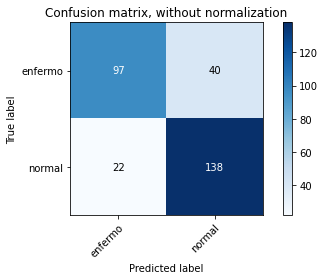

In [14]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
plot_confusion_matrix(df['target'], predictions,['enfermo','normal'], normalize=False)

Normalized confusion matrix
[[0.7080292 0.2919708]
 [0.1375    0.8625   ]]


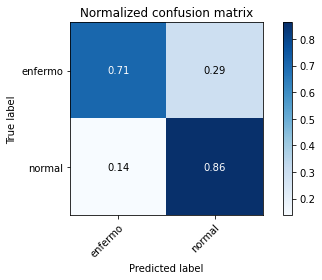

In [15]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
plot_confusion_matrix(df['target'], predictions,['enfermo','normal'], normalize=True)

### Conclusión:
Como observamos, de todos los que el modelo afirma que son enfermos, solo el 71% realmente lo son, y de todos aquellos que afirma que están sanos, solo el 86% realmente lo están, lo cual son unos valores algo preocupantes en términos de los verdaderos positivos, no es bueno que un 29% de aquellos que están sanos sean diagnosticados como enfermos, pues seguirán un tratamiento que no necesitan.

Desde nuestro punto de vista no es lo suficientemente fiable,pues creo que la salud es un ámbito que no es susceptible a error. Únicamente permitiría este uso si los valores fuesen casi perfectos, en términos de un 99% de aciertos. Creo que es tan peligroso tener falsos negativos y por tanto no tratar a personas enfermas que lo necesitan, como tener falsos positivos y tratar a personas que no lo necesitan.

Las ventajas de usar un árbol de decisión como clasificador es que son fácilmente interpretables por expertos y muy visuales. Además, nos permiten conocer las variables más importantes a la hora de elegir unas clases u otras. En este ejemplo concreto, la variable thal permite discernir desde la primera partición que se realiza, aquel grupo de personas que tienen un valor demasiado elevado o bajo respecto al normal, y que por ende tiene más probabilidades de estar enfermo y son las personas que debemos tratar de diagnosticar llevando un análisis más a fondo. 

En este caso, la parte derecha del árbol está sana y la parte izquierda está enferma, aunque tenemos un grupo pequeño de individuos erróneos en cada lado. 

En resumen, creemos que este árbol puede ayudar a encontrar aquellos síntomas y factores que más influyen en el diagnóstico médico, y que debemos tener más en cuenta, pero no debemos darle un 100% de veracidad.